In [5]:
! pip install pymc3

In [6]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

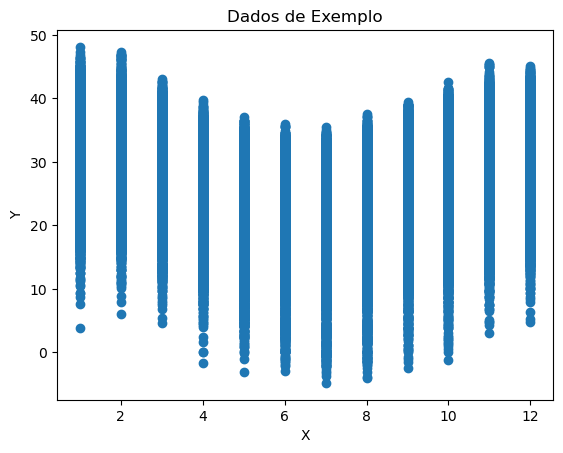

In [8]:
plt.scatter(df['Month'], df['MaxTemp'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dados de Exemplo')
plt.show()

In [9]:
with pm.Model() as model:
    # Coeficientes e intercepto
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Modelo linear
    mu = alpha + beta * df['Month']

    # Likelihood
    likelihood = pm.Normal('MaxTemp', mu=mu, sd=sigma, observed=df['MaxTemp'])

    # Inferência
    trace = pm.sample(1000, tune=1000)

/home/goncalo/miniconda3/envs/daa310/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


In [ ]:
pm.traceplot(trace)
plt.show()

# Sumário estatístico dos parâmetros
print(pm.summary(trace))

# Visualizar a regressão
plt.scatter(df['Month'], df['MaxTemp'], label='Dados Observados')
plt.xlabel('Month')
plt.ylabel('MaxTemp')

for alpha_, beta_ in zip(trace['alpha'][::50], trace['beta'][::50]):
    plt.plot(df['MaxTemp'], alpha_ + beta_ * df['X'], color='gray', alpha=0.1)

plt.title('Regressão Bayesiana')
plt.legend()
plt.show()